In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
from sklearn.cluster import KMeans

In [3]:
election = pd.read_excel(r"C:\Users\akank\Downloads\Project ML.xlsx")

In [4]:
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
election.shape

(1525, 10)

In [7]:
round(election.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.00,440.37,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.18,15.71,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.25,0.88,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.14,0.93,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.33,1.17,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.75,1.23,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.73,3.30,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.54,1.08,0.0,0.0,2.0,2.0,3.0


In [8]:
election.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
election['vote'] = le.fit_transform(election['vote'])
election = pd.get_dummies(election, columns=['vote'], drop_first=True)
election['gender'] = le.fit_transform(election['gender'])


In [10]:
# Before computing furhter anything, checking if the DataFrame has all valid data:
print(election.shape)  # Should print (rows, columns)
print(election.head())  # Check the first few rows

(1525, 9)
   age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  gender  vote_1  
0                    2       0    True  
1                    2       1    True  
2                    2       1    True  
3                    0       0    True  
4                    2       1    True  


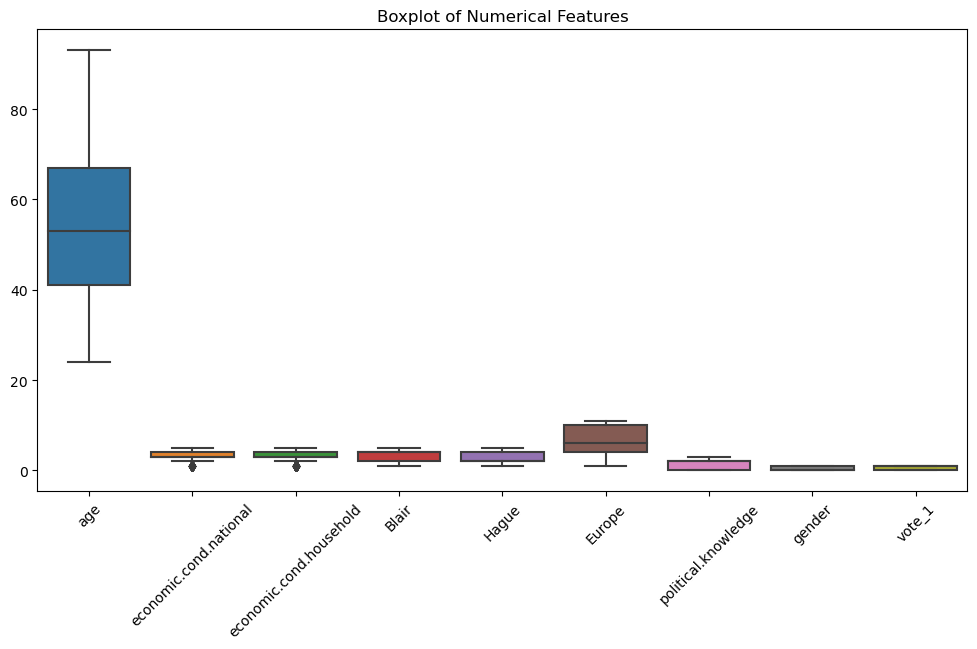

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=election)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [12]:
#none of the variables seem to have strong outliers, except for age, which has a wider spread and a few extreme values. The distributions for other variables appear compact, indicating low variance.

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\a

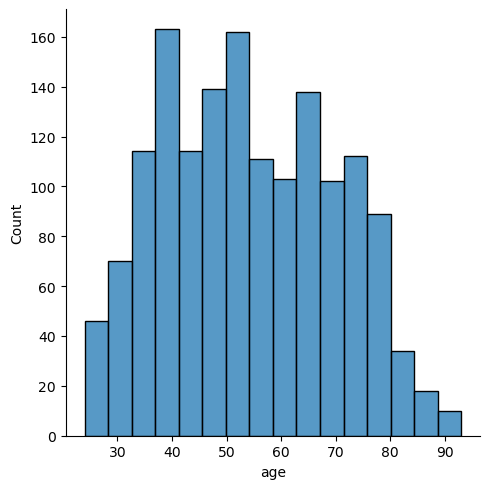

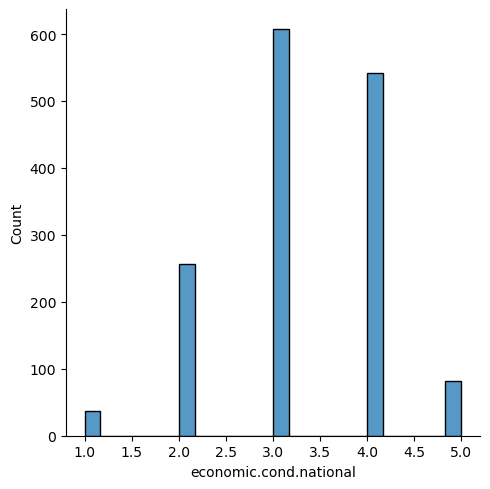

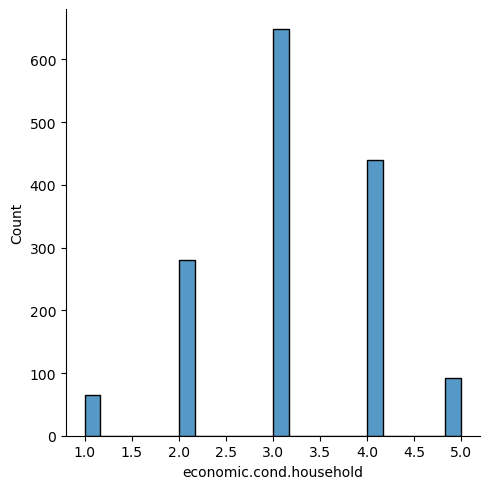

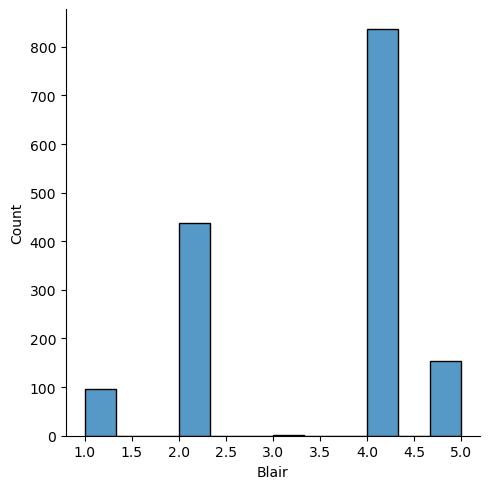

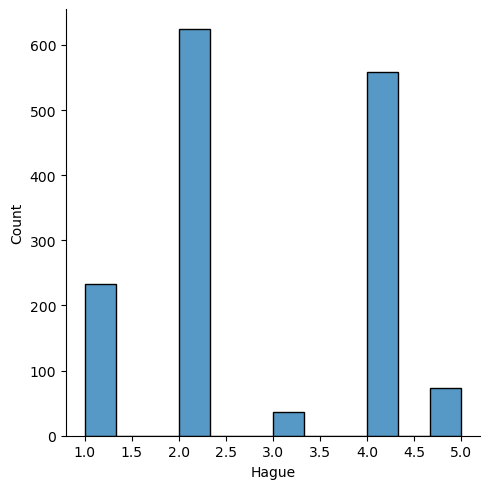

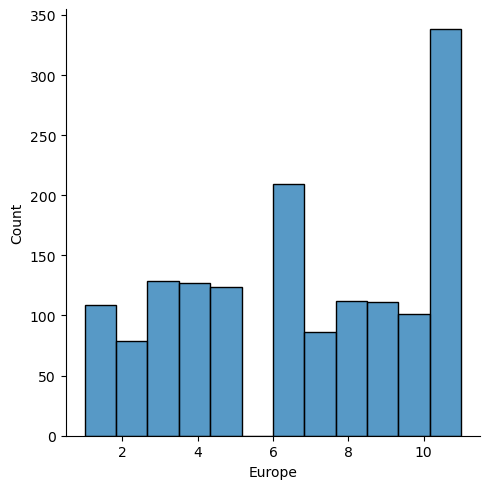

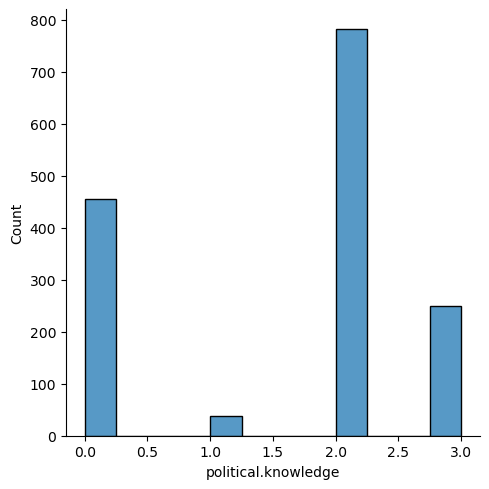

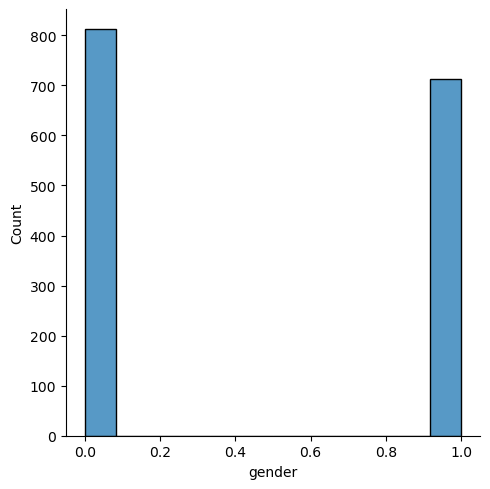

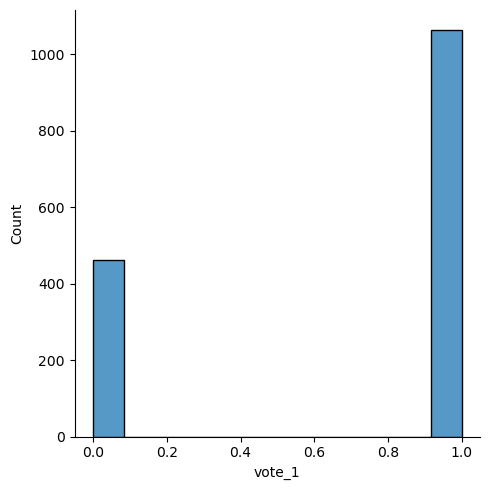

In [13]:
for col in election.columns:
        sns.displot(election[col]) 
plt.tight_layout()

<Figure size 1200x1000 with 0 Axes>

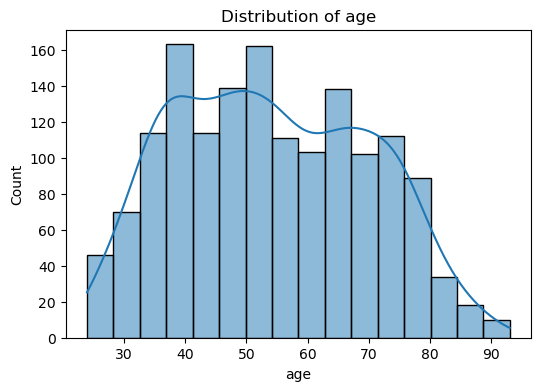

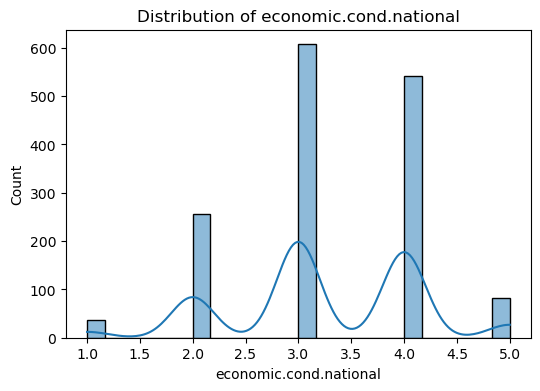

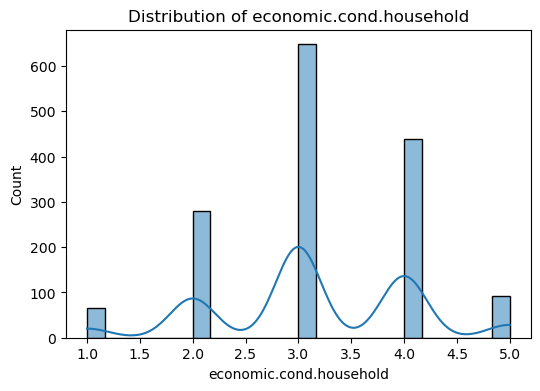

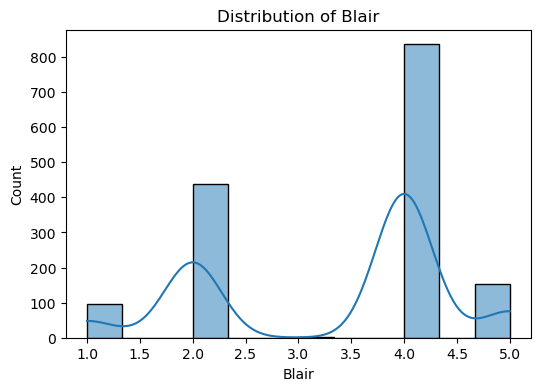

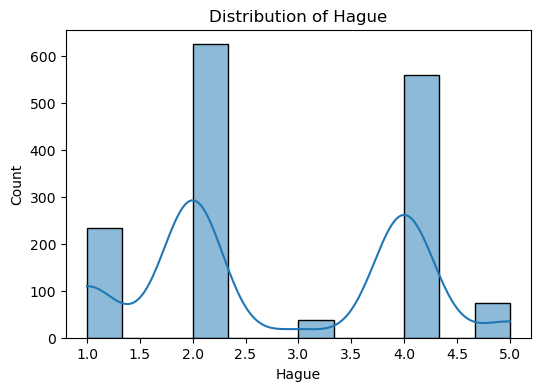

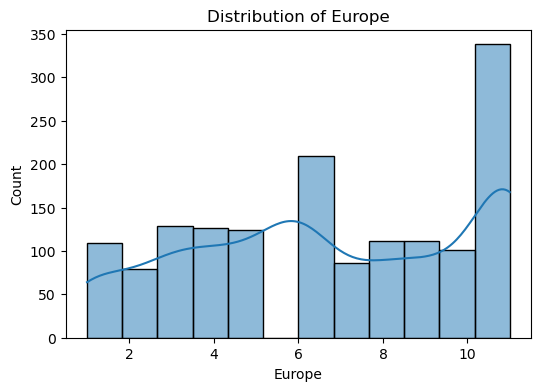

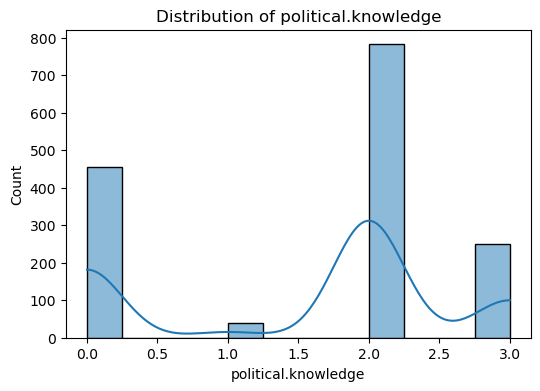

In [18]:
# Define numerical and categorical columns
numerical_cols = ['age', 'economic.cond.national', 'economic.cond.household', 
                  'Blair', 'Hague', 'Europe', 'political.knowledge']
categorical_cols = ['gender', 'vote_1']

# Plot distributions of numerical features
plt.figure(figsize=(12, 10))
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(election[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<Figure size 1200x1000 with 0 Axes>

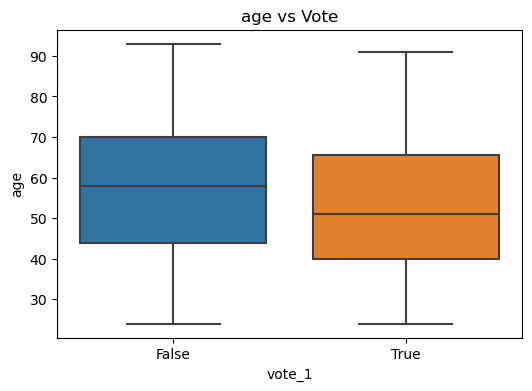

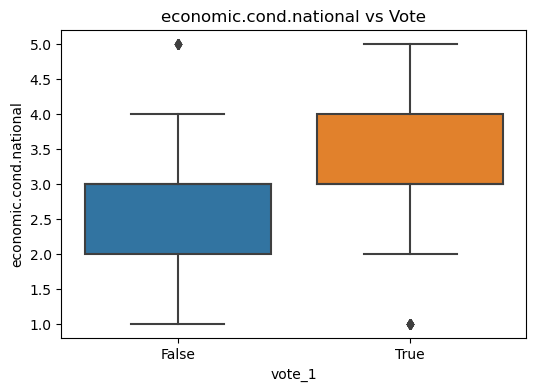

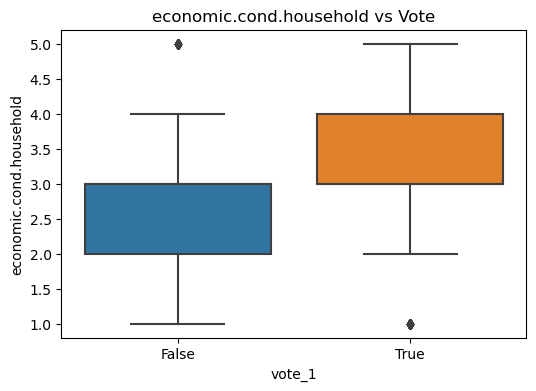

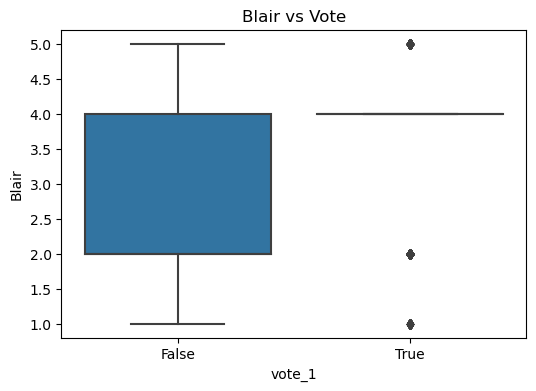

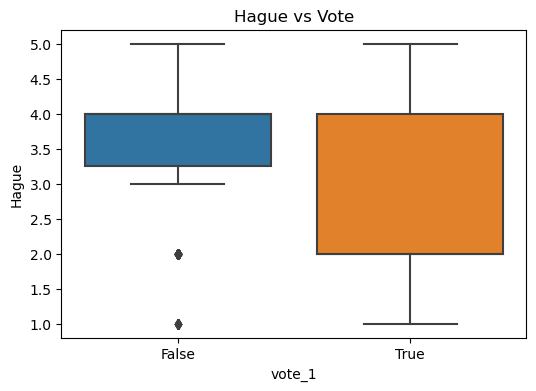

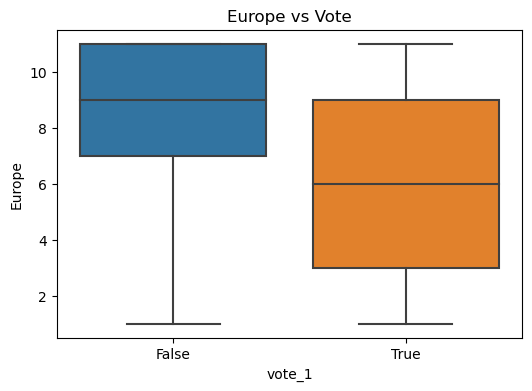

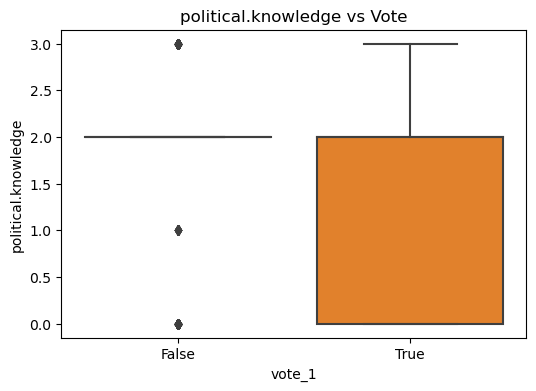

In [19]:
# Box plots to show distribution of numerical features w.r.t target variable
plt.figure(figsize=(12, 10))
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=election['vote_1'], y=election[col])
    plt.title(f'{col} vs Vote')
    plt.show()

<Figure size 1000x500 with 0 Axes>

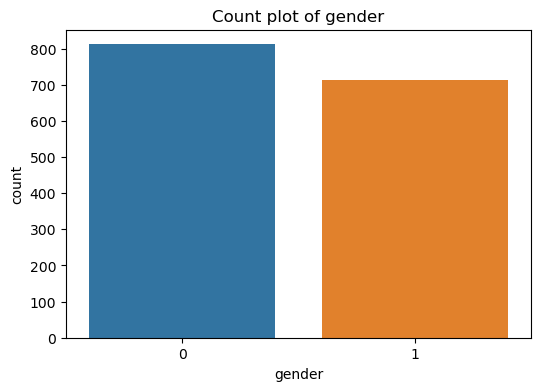

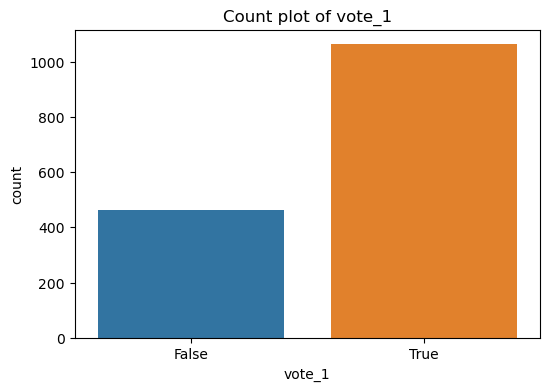

In [20]:

# Count plot for categorical variables
plt.figure(figsize=(10, 5))
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=election[col])
    plt.title(f'Count plot of {col}')
    plt.show()

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


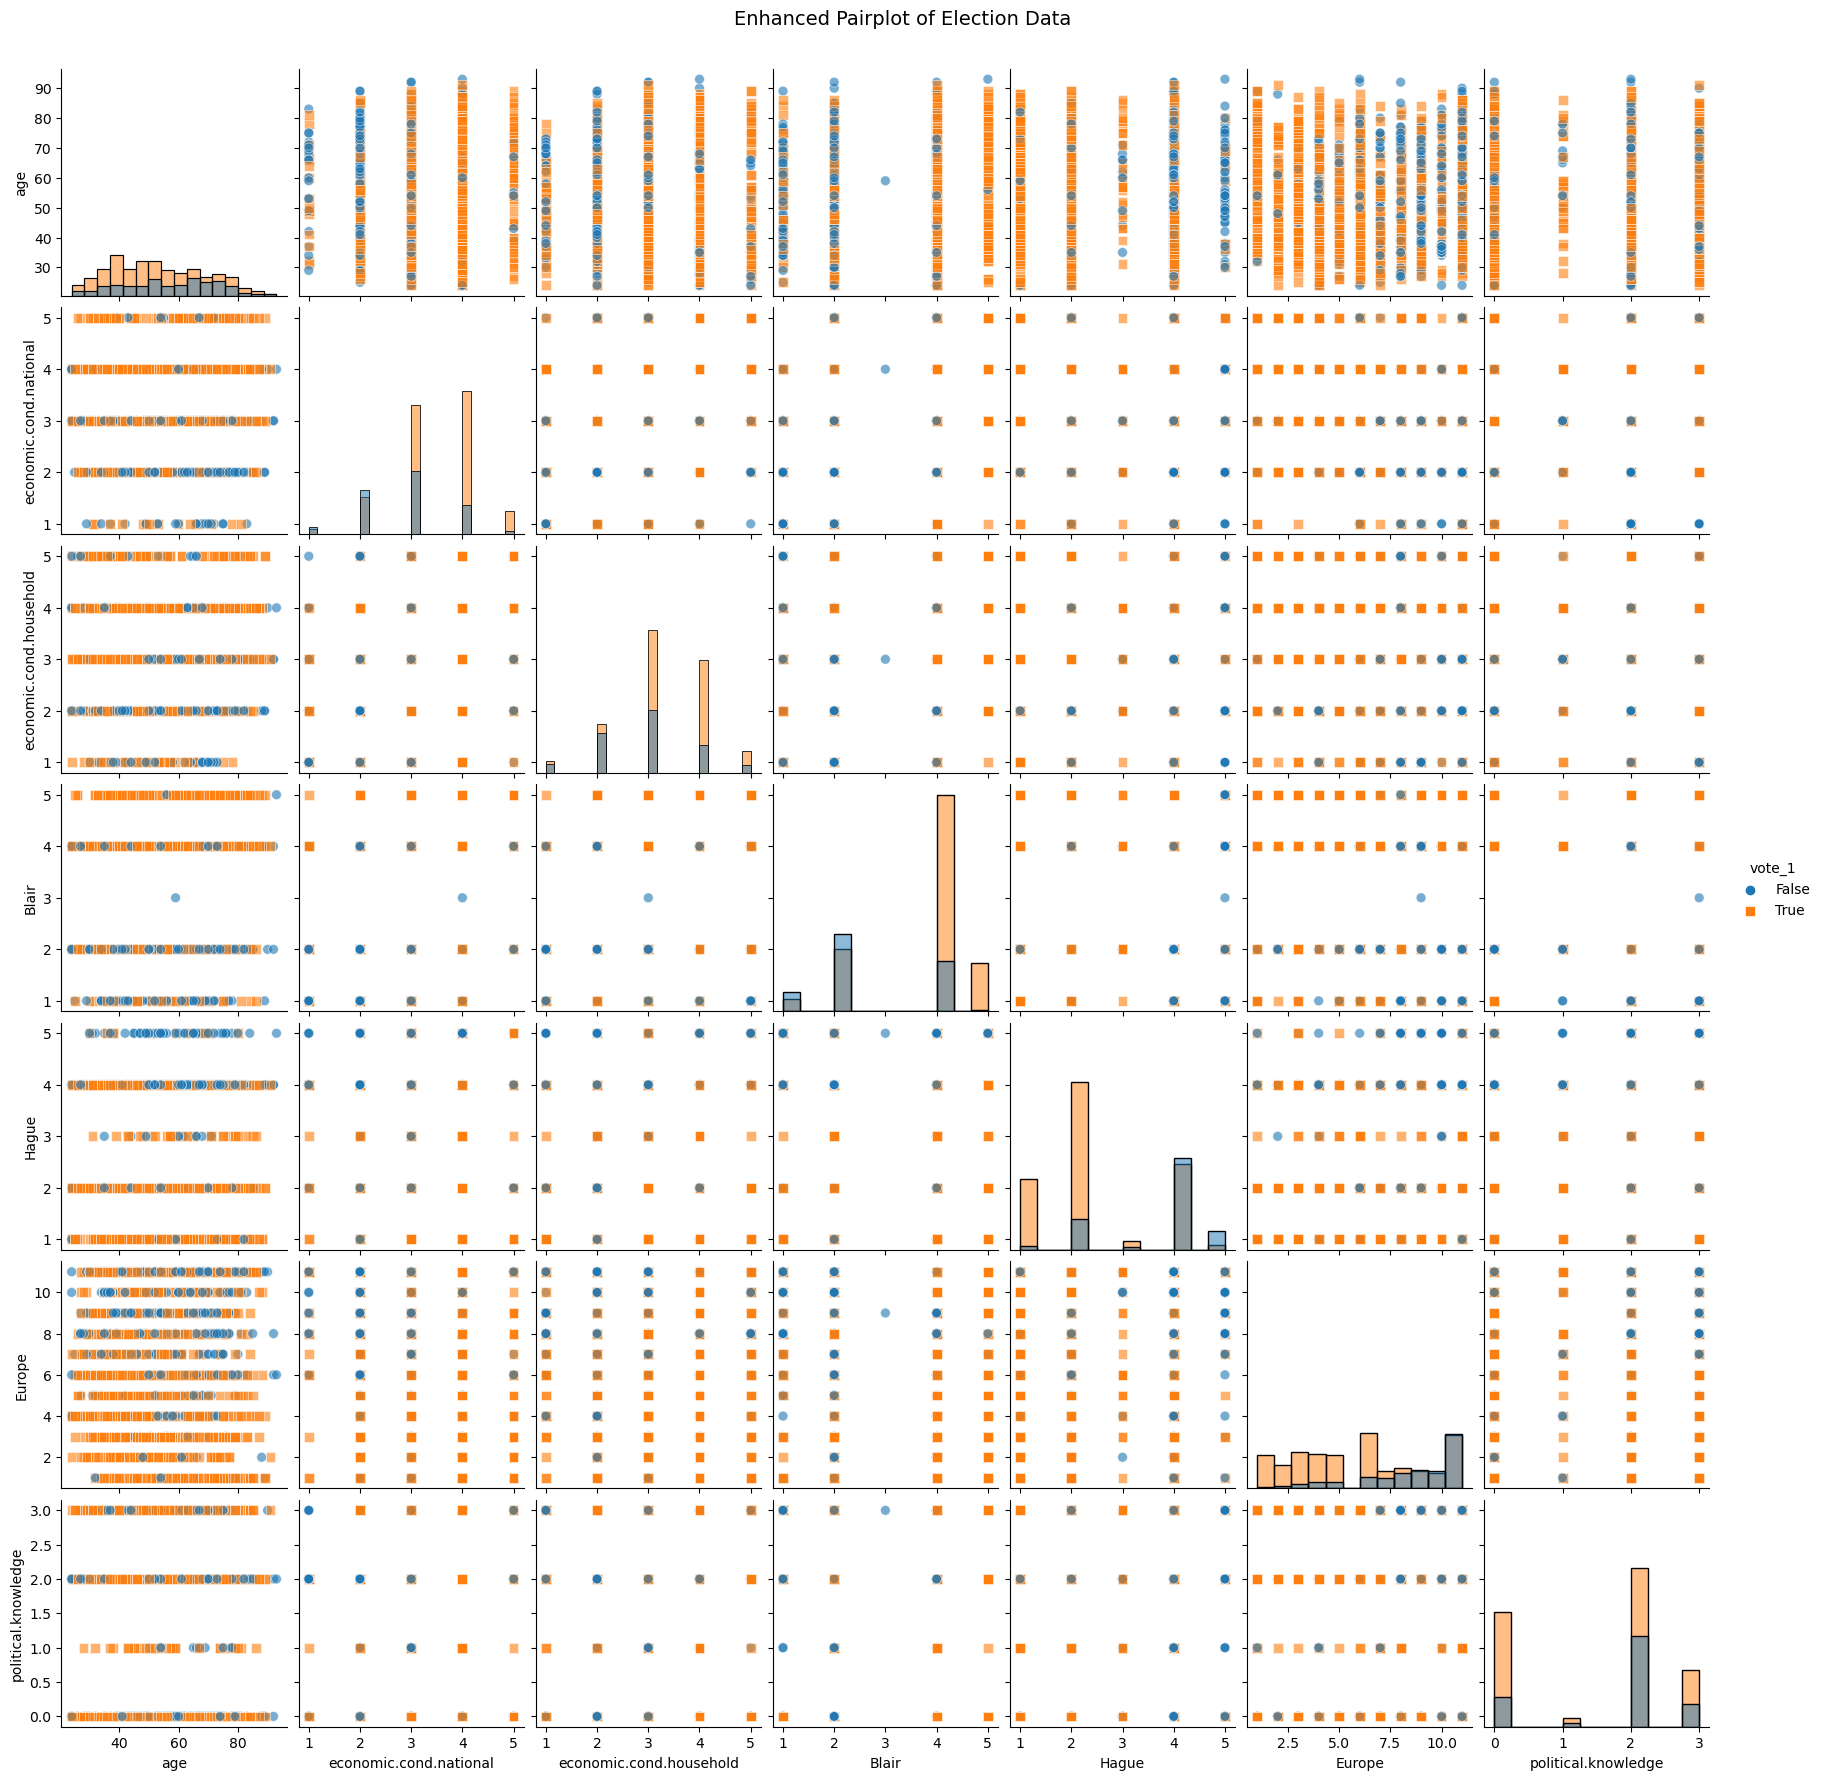

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns
numerical_cols = ['age', 'economic.cond.national', 'economic.cond.household', 
                  'Blair', 'Hague', 'Europe', 'political.knowledge']

# Improved Pairplot with Histograms in Diagonal
pairplot_fig = sns.pairplot(election, vars=numerical_cols, hue='vote_1', diag_kind='hist', 
                            markers=["o", "s"], plot_kws={'alpha':0.6, 's':50})

# Adding title
pairplot_fig.fig.suptitle('Enhanced Pairplot of Election Data', y=1.02, fontsize=14)

plt.show()

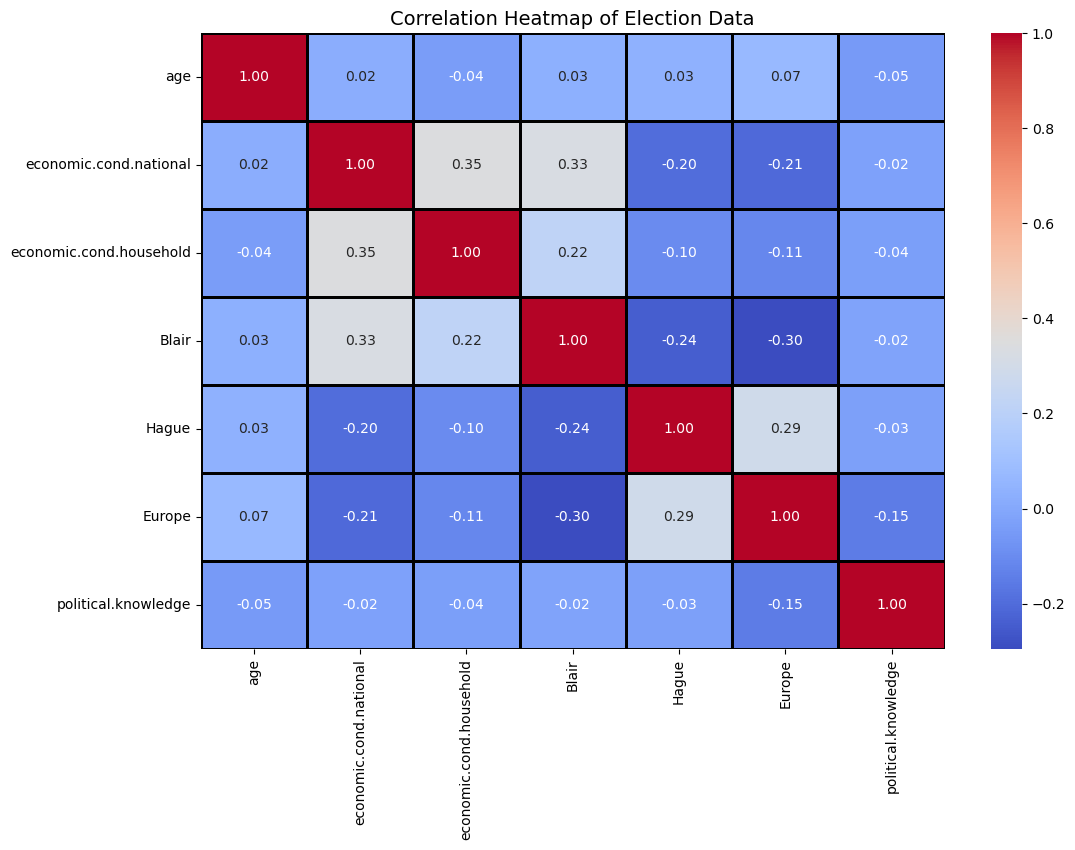

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting figure size
plt.figure(figsize=(12, 8))

# Generating correlation matrix
corr_matrix = election[['age', 'economic.cond.national', 'economic.cond.household', 
                        'Blair', 'Hague', 'Europe', 'political.knowledge']].corr()

# Creating heatmap with better visualization
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, linecolor='black')

# Adding title
plt.title('Correlation Heatmap of Election Data', fontsize=14)

# Displaying the plot
plt.show()

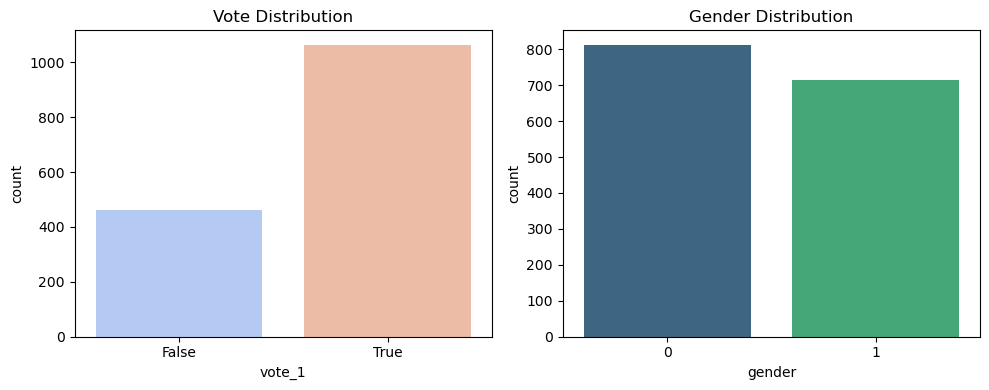

In [24]:
# Countplot for vote_1 and gender
plt.figure(figsize=(10, 4))

# Vote distribution
plt.subplot(1, 2, 1)
sns.countplot(x=election['vote_1'], palette='coolwarm')
plt.title('Vote Distribution')

# Gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x=election['gender'], palette='viridis')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

In [26]:
# getting the target variable
election["vote_1"].value_counts()

vote_1
True     1063
False     462
Name: count, dtype: int64

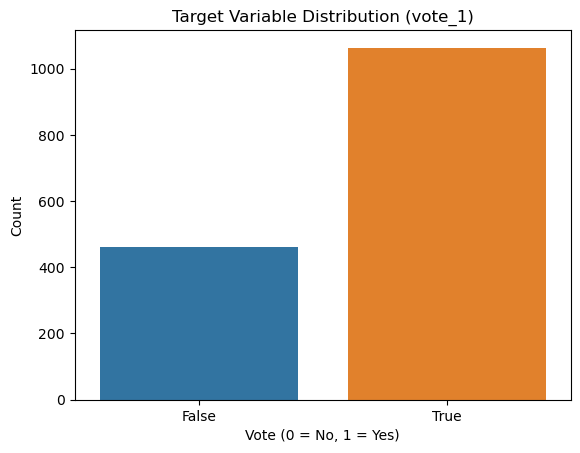

In [27]:
sns.countplot(x=election["vote_1"])
plt.title("Target Variable Distribution (vote_1)")
plt.xlabel("Vote (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
##Data Preparation

In [28]:
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = election.drop(columns=['vote_1'])  # Assuming 'vote_1' is the target variable
y = election['vote_1']

# Splitting dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (1220, 8), Test Set: (305, 8)


In [29]:
categorical_features = ['gender']  # Modify based on dataset
election = pd.get_dummies(election, columns=categorical_features, drop_first=True)
label_encoder = LabelEncoder()
election['vote_1'] = label_encoder.fit_transform(election['vote_1'])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
S=StandardScaler()

In [31]:
numeric_cols = election.select_dtypes(include=['number']).columns
scaler = StandardScaler()
election[numeric_cols] = scaler.fit_transform(election[numeric_cols])

In [32]:
k_means = KMeans(n_clusters = 2)

In [33]:
numeric_cols = election.select_dtypes(include=['number']).columns
election_numeric = election[numeric_cols]  


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
election_scaled = scaler.fit_transform(election_numeric)

# Confirm that scaling worked
print(election_scaled[:5])


[[-0.71197344 -0.2792178  -0.15094757  0.56671641 -1.41988571 -1.43442628
   0.42264269 -0.9370586 ]
 [-1.15766138  0.85626791  0.92473019  0.56671641  1.01854414 -0.5243583
   0.42264269  1.06716912]
 [-1.22133109  0.85626791  0.92473019  1.41818687 -0.60707576 -1.13107028
   0.42264269  1.06716912]
 [-1.92169785  0.85626791 -1.22662532 -1.13622452 -1.41988571 -0.82771429
  -1.42414843 -0.9370586 ]
 [-0.83931285 -1.4147035  -1.22662532 -1.98769498 -1.41988571 -0.2210023
   0.42264269  1.06716912]]


In [35]:
k_means.fit(election_scaled)
print(k_means.inertia_)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


10144.161731302618


In [36]:
k_means.labels_

array([1, 1, 1, ..., 1, 0, 0])

In [37]:
Wss=[]

In [38]:
for i in range(1,9):
    KM = KMeans(n_clusters=i)
    KM.fit(election_scaled)
    Wss.append(KM.inertia_)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [39]:
Wss

[12200.0,
 10144.161731302618,
 9088.82147066182,
 8442.453614121441,
 7935.374065452052,
 7576.729358634601,
 7325.531572855304,
 7025.37171686179]

Text(0.5, 1.0, 'ELBOW PLOT')

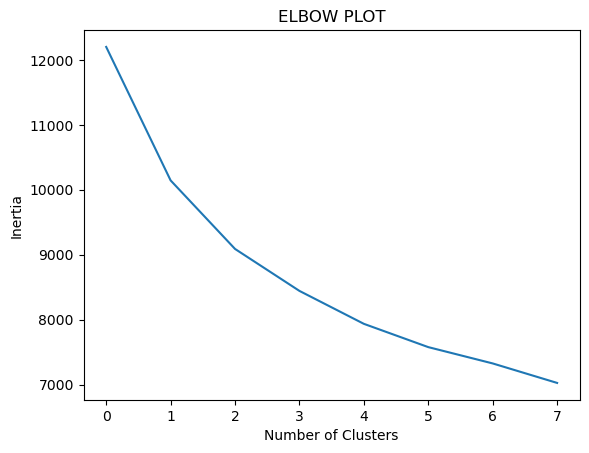

In [40]:
plt.plot(Wss);
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('ELBOW PLOT')

In [41]:
k_means = KMeans(n_clusters = 2)
k_means.fit(election_scaled)
labels = k_means.labels_

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [42]:
election["Clus_kmeans"] = labels
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,Clus_kmeans
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059,True,0
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169,True,0
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169,True,0
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059,True,0
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169,True,1


In [43]:
election['Clus_kmeans'].value_counts()

Clus_kmeans
0    851
1    674
Name: count, dtype: int64

In [44]:
#Hierarchial Clustering

In [45]:
wardlink = linkage(election_scaled, method = 'ward')

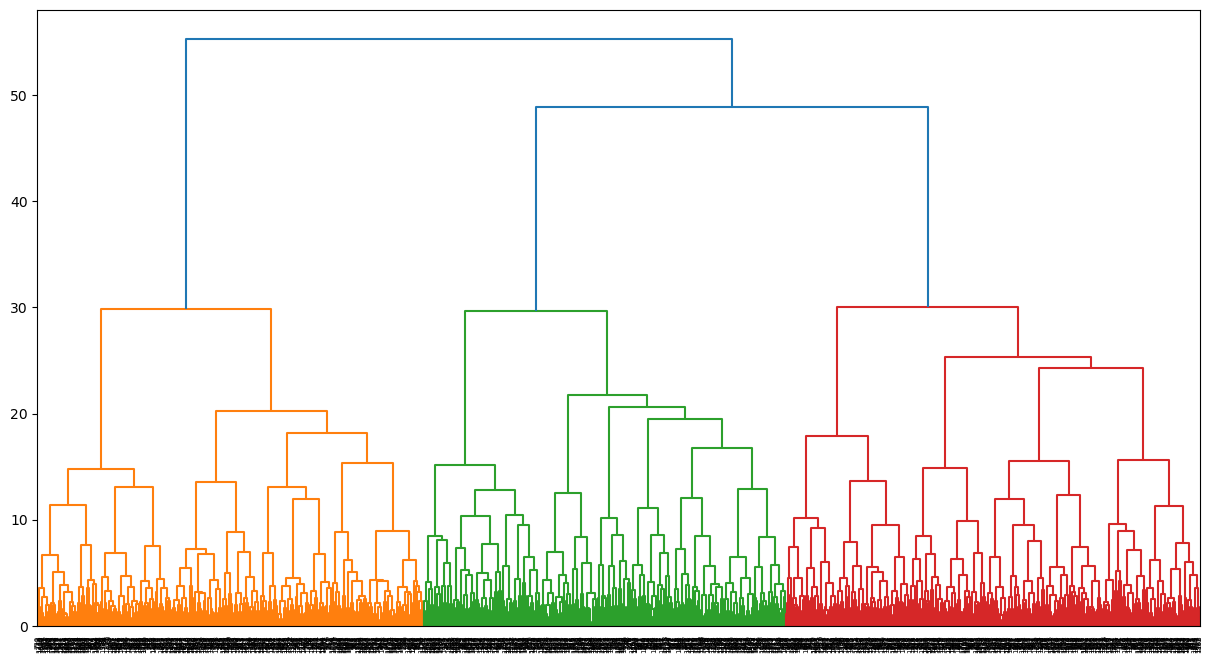

In [46]:
plt.figure(figsize=(15,8))
dend = dendrogram(wardlink)

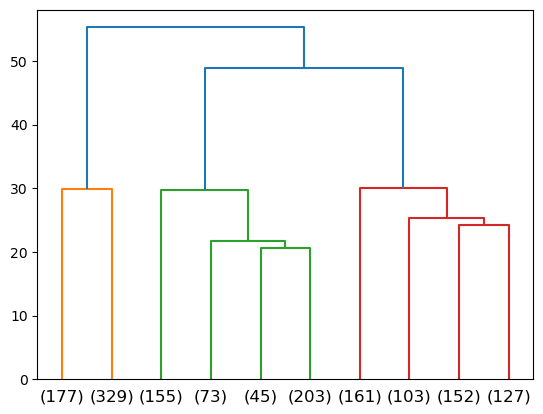

In [47]:
dend2 = dendrogram(wardlink,truncate_mode='lastp',p = 10)

In [48]:
clusters_maxclust = fcluster(wardlink, 2, criterion='maxclust')
clusters_maxclust

array([1, 1, 1, ..., 1, 2, 2], dtype=int32)

In [49]:
clusters_dist = fcluster(wardlink, 25, criterion='distance')
clusters_dist

array([1, 2, 2, ..., 2, 7, 4], dtype=int32)

In [50]:
election['clusters_maxclust']=clusters_maxclust
election['clusters_dist']=clusters_dist
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,Clus_kmeans,clusters_maxclust,clusters_dist
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059,True,0,1,1
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169,True,0,1,2
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169,True,0,1,2
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059,True,0,2,4
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169,True,1,2,7


In [51]:
election['match'] = election['clusters_maxclust'] - election['clusters_dist']
election['match'].value_counts()

match
-1    484
-2    321
-5    279
 0    177
-3    161
-4    103
Name: count, dtype: int64

In [52]:
# clustering matching for maxclust and distance
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,Clus_kmeans,clusters_maxclust,clusters_dist,match
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059,True,0,1,1,0
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169,True,0,1,2,-1
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169,True,0,1,2,-1
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059,True,0,2,4,-2
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169,True,1,2,7,-5


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
election_scaled = scaler.fit_transform(election_numeric)  # Replace election with only numeric columns

print(election_scaled[:5])  # Check first 5 rows


[[0.27536232 0.5        0.5        0.75       0.         0.1
  0.66666667 0.        ]
 [0.17391304 0.75       0.75       0.75       0.75       0.4
  0.66666667 1.        ]
 [0.15942029 0.75       0.75       1.         0.25       0.2
  0.66666667 1.        ]
 [0.         0.75       0.25       0.25       0.         0.3
  0.         0.        ]
 [0.24637681 0.25       0.25       0.         0.         0.5
  0.66666667 1.        ]]


In [54]:
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,Clus_kmeans,clusters_maxclust,clusters_dist,match
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059,True,0,1,1,0
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169,True,0,1,2,-1
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169,True,0,1,2,-1
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059,True,0,2,4,-2
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169,True,1,2,7,-5


In [55]:
kmc1=election.drop(['clusters_maxclust','clusters_dist'],axis=1)[(election.Clus_kmeans == 0)]
kmc1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,Clus_kmeans,match
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059,True,0,0
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169,True,0,-1
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169,True,0,-1
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059,True,0,-2
5,-0.457295,-0.279218,0.924730,0.566716,1.018544,-0.827714,0.422643,1.067169,True,0,-1


In [56]:
kmc2=election.drop(['clusters_maxclust','clusters_dist'],axis=1)[(election.Clus_kmeans == 1)]
kmc2.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,Clus_kmeans,match
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169,True,1,-5
6,0.179402,-1.414704,-1.226625,0.566716,1.018544,1.295778,0.422643,1.067169,True,1,-3
8,-0.966652,-0.279218,-0.150948,0.566716,1.018544,1.295778,-1.424148,-0.937059,True,1,-2
10,-0.966652,-0.279218,-0.150948,-1.987695,-0.607076,0.082354,-1.424148,-0.937059,True,1,-2
13,0.752430,-0.279218,-0.150948,-1.136225,1.831354,0.385710,-1.424148,-0.937059,True,1,-5


In [57]:
hc1=election.drop(['Clus_kmeans','clusters_dist'],axis=1)[(election['clusters_maxclust'] == 1)]
hc1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,clusters_maxclust,match
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059,True,1,0
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169,True,1,-1
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169,True,1,-1
5,-0.457295,-0.279218,0.924730,0.566716,1.018544,-0.827714,0.422643,1.067169,True,1,-1
7,1.452797,-0.279218,0.924730,0.566716,-1.419886,-1.737782,-1.424148,1.067169,True,1,-1


In [58]:
hc2=election.drop(['Clus_kmeans','clusters_dist'],axis=1)[(election['clusters_maxclust'] == 2)]
hc2.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_1,clusters_maxclust,match
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059,True,2,-2
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169,True,2,-5
6,0.179402,-1.414704,-1.226625,0.566716,1.018544,1.295778,0.422643,1.067169,True,2,-3
8,-0.966652,-0.279218,-0.150948,0.566716,1.018544,1.295778,-1.424148,-0.937059,True,2,-2
10,-0.966652,-0.279218,-0.150948,-1.987695,-0.607076,0.082354,-1.424148,-0.937059,True,2,-2


In [59]:
round(kmc1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,851.0,-0.05,1.01,-1.92,-0.90,-0.14,0.75,2.47
economic.cond.national,851.0,0.46,0.80,-2.55,-0.28,0.86,0.86,1.99
economic.cond.household,851.0,0.39,0.85,-2.30,-0.15,-0.15,0.92,2.00
Blair,851.0,0.57,0.63,-1.99,0.57,0.57,0.57,1.42
Hague,851.0,-0.40,0.88,-1.42,-0.61,-0.61,-0.61,1.83
Europe,851.0,-0.44,0.91,-1.74,-1.13,-0.52,0.08,1.30
political.knowledge,851.0,0.03,1.02,-1.42,-1.42,0.42,0.42,1.35
gender,851.0,0.13,1.00,-0.94,-0.94,1.07,1.07,1.07
Clus_kmeans,851.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
match,851.0,-1.28,1.03,-5.00,-2.00,-1.00,-1.00,0.00


In [60]:
round(kmc2.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,674.0,0.06,0.98,-1.92,-0.71,-0.01,0.88,2.41
economic.cond.national,674.0,-0.59,0.91,-2.55,-1.41,-0.28,-0.28,1.99
economic.cond.household,674.0,-0.49,0.95,-2.30,-1.23,-0.15,-0.15,2.00
Blair,674.0,-0.72,0.92,-1.99,-1.14,-1.14,0.57,1.42
Hague,674.0,0.51,0.91,-1.42,-0.61,1.02,1.02,1.83
Europe,674.0,0.56,0.81,-1.74,0.08,0.69,1.30,1.30
political.knowledge,674.0,-0.04,0.98,-1.42,-1.42,0.42,0.42,1.35
gender,674.0,-0.17,0.97,-0.94,-0.94,-0.94,1.07,1.07
Clus_kmeans,674.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
match,674.0,-3.45,1.49,-5.00,-5.00,-4.00,-2.00,0.00


In [61]:
round(hc1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,506.0,-0.10,0.98,-1.92,-0.90,-0.20,0.63,2.34
economic.cond.national,506.0,0.41,0.88,-2.55,-0.28,0.86,0.86,1.99
economic.cond.household,506.0,0.31,0.88,-2.30,-0.15,-0.15,0.92,2.00
Blair,506.0,0.72,0.35,-1.14,0.57,0.57,0.57,1.42
Hague,506.0,-0.57,0.74,-1.42,-0.61,-0.61,-0.61,1.83
Europe,506.0,-0.66,0.84,-1.74,-1.43,-0.83,-0.22,1.30
political.knowledge,506.0,0.60,0.54,-1.42,0.42,0.42,1.35,1.35
gender,506.0,0.33,0.97,-0.94,-0.94,1.07,1.07,1.07
clusters_maxclust,506.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
match,506.0,-0.65,0.48,-1.00,-1.00,-1.00,0.00,0.00


In [62]:
round(hc2.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,1019.0,0.05,1.01,-1.92,-0.78,-0.01,0.88,2.47
economic.cond.national,1019.0,-0.20,0.99,-2.55,-0.28,-0.28,0.86,1.99
economic.cond.household,1019.0,-0.16,1.02,-2.30,-1.23,-0.15,0.92,2.00
Blair,1019.0,-0.36,1.02,-1.99,-1.14,-1.14,0.57,1.42
Hague,1019.0,0.28,0.99,-1.42,-0.61,1.02,1.02,1.83
Europe,1019.0,0.33,0.91,-1.74,-0.22,0.39,1.30,1.30
political.knowledge,1019.0,-0.30,1.04,-1.42,-1.42,0.42,0.42,1.35
gender,1019.0,-0.16,0.98,-0.94,-0.94,-0.94,1.07,1.07
clusters_maxclust,1019.0,2.00,0.00,2.00,2.00,2.00,2.00,2.00
match,1019.0,-3.03,1.46,-5.00,-5.00,-3.00,-2.00,-1.00


In [ ]:
##Model Building

In [31]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.5/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 0.5/124.9 MB 3.7 MB/s eta 0:00:35
   ---------------------------------------- 0.6/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 0.8/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.0/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.1/124.9 MB 3.1 MB/s eta 0:00:40
   ---------------------------------------- 1.2/124.9 MB 2.9 MB/s eta 0:00:44
   --------------------------

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
##Define model

In [33]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [34]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None  # Some models don't have predict_proba

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append([name, accuracy, precision, recall, f1, auc])

    print(f"📌 {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-score: {f1:.4f} | AUC: {auc}\n")

📌 Logistic Regression
Confusion Matrix:
 [[ 62  30]
 [ 18 195]]
Accuracy: 0.8426 | Precision: 0.8390 | Recall: 0.8426 | F1-score: 0.8393 | AUC: 0.8957950602163706

📌 Decision Tree
Confusion Matrix:
 [[ 62  30]
 [ 19 194]]
Accuracy: 0.8393 | Precision: 0.8357 | Recall: 0.8393 | F1-score: 0.8363 | AUC: 0.8831139007960809

📌 Random Forest
Confusion Matrix:
 [[ 63  29]
 [ 19 194]]
Accuracy: 0.8426 | Precision: 0.8393 | Recall: 0.8426 | F1-score: 0.8399 | AUC: 0.893677281077771

📌 Gradient Boosting
Confusion Matrix:
 [[ 63  29]
 [ 17 196]]
Accuracy: 0.8492 | Precision: 0.8459 | Recall: 0.8492 | F1-score: 0.8460 | AUC: 0.9058226168605837



C:\Users\akank\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:44:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost
Confusion Matrix:
 [[ 63  29]
 [ 24 189]]
Accuracy: 0.8262 | Precision: 0.8239 | Recall: 0.8262 | F1-score: 0.8248 | AUC: 0.8716574811185958

📌 SVM
Confusion Matrix:
 [[ 62  30]
 [ 18 195]]
Accuracy: 0.8426 | Precision: 0.8390 | Recall: 0.8426 | F1-score: 0.8393 | AUC: 0.8964584609103899

📌 KNN
Confusion Matrix:
 [[ 55  37]
 [ 29 184]]
Accuracy: 0.7836 | Precision: 0.7789 | Recall: 0.7836 | F1-score: 0.7807 | AUC: 0.8164931618697693



In [35]:
results_election = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
results_election.sort_values(by="Accuracy", ascending=False, inplace=True)
print(results_election)

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
3    Gradient Boosting  0.849180   0.845891  0.849180  0.845985  0.905823
0  Logistic Regression  0.842623   0.839016  0.842623  0.839289  0.895795
2        Random Forest  0.842623   0.839290  0.842623  0.839905  0.893677
5                  SVM  0.842623   0.839016  0.842623  0.839289  0.896458
1        Decision Tree  0.839344   0.835715  0.839344  0.836259  0.883114
4              XGBoost  0.826230   0.823888  0.826230  0.824810  0.871657
6                  KNN  0.783607   0.778942  0.783607  0.780683  0.816493


In [36]:
# Convert results into a DataFrame
results_election = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

# Sort models based on Accuracy
results_election.sort_values(by="Accuracy", ascending=False, inplace=True)

# Display the performance metrics in a sorted order
print("Model Performance Summary:")
display(results_election)

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score,AUC
3,Gradient Boosting,0.849180,0.845891,0.849180,0.845985,0.905823
0,Logistic Regression,0.842623,0.839016,0.842623,0.839289,0.895795
2,Random Forest,0.842623,0.839290,0.842623,0.839905,0.893677
5,SVM,0.842623,0.839016,0.842623,0.839289,0.896458
1,Decision Tree,0.839344,0.835715,0.839344,0.836259,0.883114
4,XGBoost,0.826230,0.823888,0.826230,0.824810,0.871657
6,KNN,0.783607,0.778942,0.783607,0.780683,0.816493


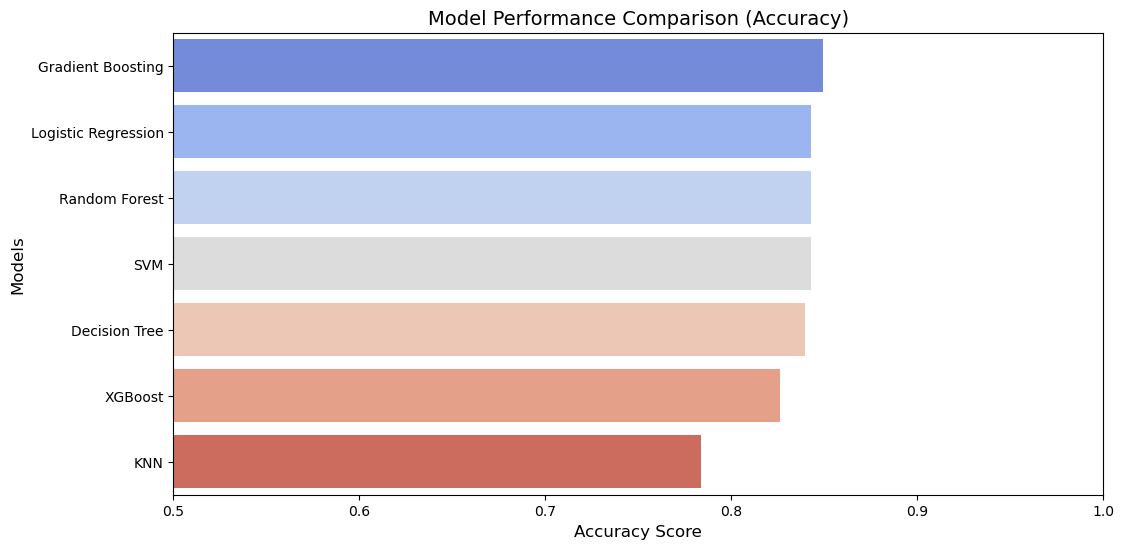

In [39]:
palette = sns.color_palette("coolwarm", len(results_election))

plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_election, palette=palette)
plt.xlabel("Accuracy Score", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.title("Model Performance Comparison (Accuracy)", fontsize=14)
plt.xlim(0.5, 1.0)  # Adjusting x-axis for better clarity
plt.show()

In [40]:
# Getting the best-performing model based on Accuracy
best_model = results_election.iloc[0]["Model"]
best_accuracy = results_election.iloc[0]["Accuracy"]
print(f"Best Model: {best_model} with Accuracy = {best_accuracy:.4f}")

Best Model: Gradient Boosting with Accuracy = 0.8492


In [42]:
# Getting the best-performing model based on recall
best_model = results_election.iloc[0]["Model"]
best_recall= results_election.iloc[0]["Recall"]
print(f"Best Model: {best_model} with Recall= {best_recall:.4f}")

Best Model: Gradient Boosting with Recall= 0.8492


In [44]:
# Exclude models where AUC is not available
auc_df = results_election[results_election["AUC"] != "N/A"].copy()
auc_df.sort_values(by="AUC", ascending=False, inplace=True)

print("\nModel Ranking Based on AUC:")
display(auc_df)


Model Ranking Based on AUC:


,Model,Accuracy,Precision,Recall,F1-Score,AUC
3,Gradient Boosting,0.849180,0.845891,0.849180,0.845985,0.905823
5,SVM,0.842623,0.839016,0.842623,0.839289,0.896458
0,Logistic Regression,0.842623,0.839016,0.842623,0.839289,0.895795
2,Random Forest,0.842623,0.839290,0.842623,0.839905,0.893677
1,Decision Tree,0.839344,0.835715,0.839344,0.836259,0.883114
4,XGBoost,0.826230,0.823888,0.826230,0.824810,0.871657
6,KNN,0.783607,0.778942,0.783607,0.780683,0.816493


In [ ]:
##Model Evaluation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Train Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train Gradient Boosting (XGBoost)
xgb_model = GradientBoostingClassifier()
xgb_model.fit(X_train, y_train)

# Train Support Vector Machine (SVM)
svm_model = SVC(probability=True)  # Enable probability predictions for ROC-AUC
svm_model.fit(X_train, y_train)

# Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [48]:
# Predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Function to evaluate model
def evaluate_model(y_test, y_pred, model_name):
    print(f"📌 Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print("-" * 50)

# Evaluate each model
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "Gradient Boosting (XGBoost)")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

📌 Model: Logistic Regression
Accuracy: 0.8459
Precision: 0.8424
Recall: 0.8459
F1 Score: 0.8417
ROC-AUC Score: 0.7940
--------------------------------------------------
📌 Model: Decision Tree
Accuracy: 0.8033
Precision: 0.7965
Recall: 0.8033
F1 Score: 0.7966
ROC-AUC Score: 0.7387
--------------------------------------------------
📌 Model: Random Forest
Accuracy: 0.8459
Precision: 0.8424
Recall: 0.8459
F1 Score: 0.8423
ROC-AUC Score: 0.7971
--------------------------------------------------
📌 Model: Gradient Boosting (XGBoost)
Accuracy: 0.8492
Precision: 0.8459
Recall: 0.8492
F1 Score: 0.8460
ROC-AUC Score: 0.8025
--------------------------------------------------
📌 Model: Support Vector Machine (SVM)
Accuracy: 0.7607
Precision: 0.7666
Recall: 0.7607
F1 Score: 0.7187
ROC-AUC Score: 0.6249
--------------------------------------------------
📌 Model: K-Nearest Neighbors (KNN)
Accuracy: 0.7836
Precision: 0.7789
Recall: 0.7836
F1 Score: 0.7807
ROC-AUC Score: 0.7308
--------------------------

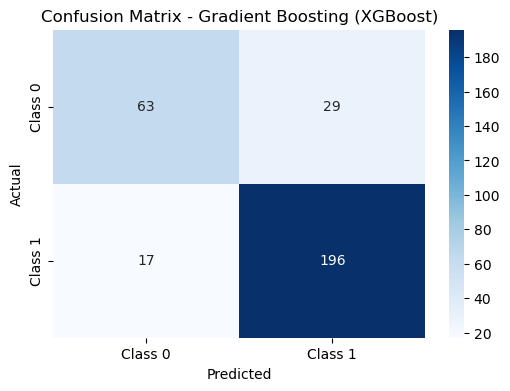

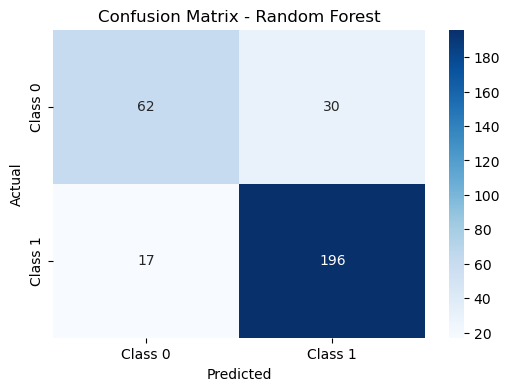

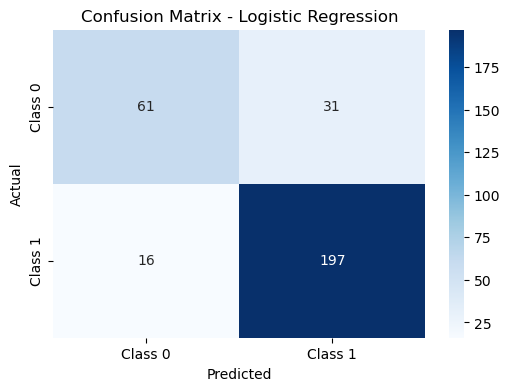

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrix for best models
plot_confusion_matrix(y_test, y_pred_xgb, "Gradient Boosting (XGBoost)")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")

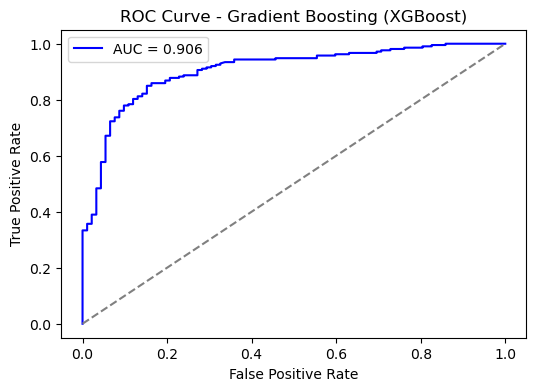

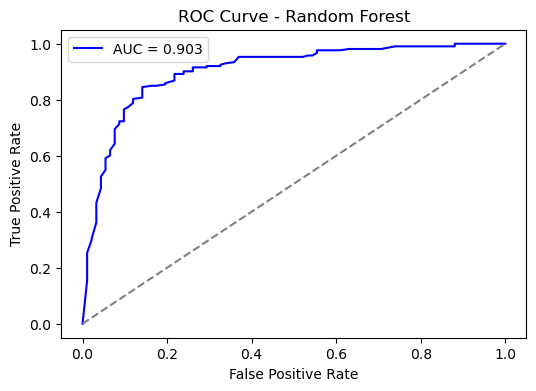

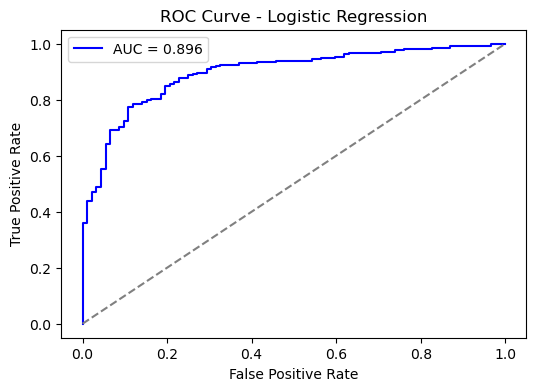

In [51]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

# Plot ROC curve for best models
plot_roc_curve(xgb_model, X_test, y_test, "Gradient Boosting (XGBoost)")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")
plot_roc_curve(logreg_model, X_test, y_test, "Logistic Regression")

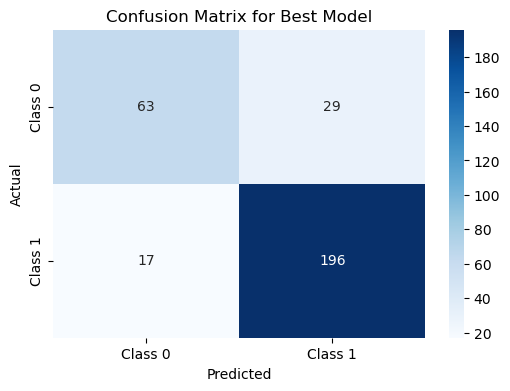

In [52]:
best_model = models['Gradient Boosting']  # Replace with your best model
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Model')
plt.show()

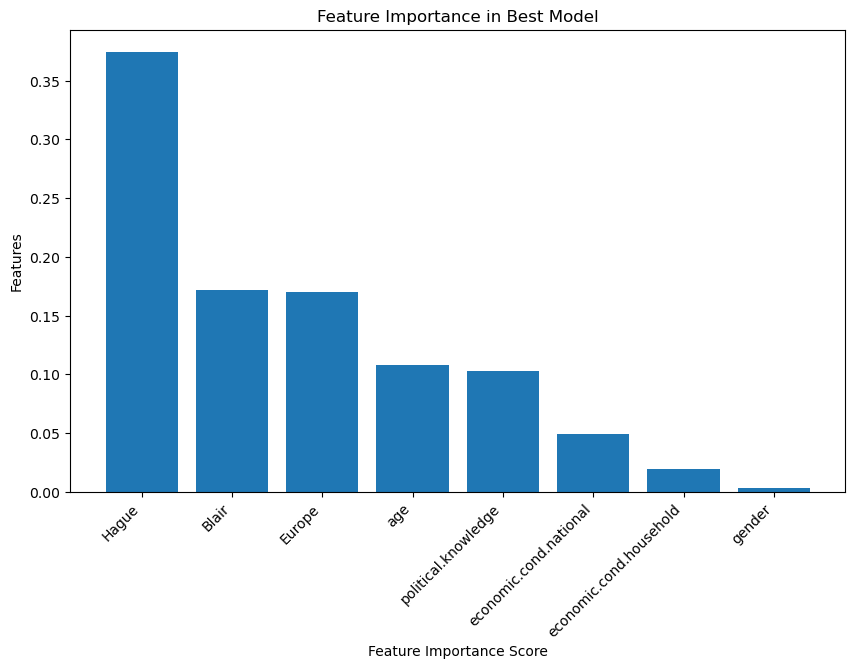

In [53]:
if hasattr(best_model, "feature_importances_"):  # Works for RandomForest, XGBoost, DecisionTree
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns  # Make sure your dataframe column names are used

    sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
    plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance in Best Model")
    plt.show()